***
<span style="color:#008385">

**15-448: Machine Learning in a Nutshell**, *CMU-Qatar* Spring'20

**Gianni A. Di Caro**, www.giannidicaro.com

<u>Disclaimer:</u> This notebook was prepared for teaching purposes. It can include material from different web sources. I'll happy to explicitly acknowledge a source if required. 
</span>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-regression-with-non-linear-feature-transformations" data-toc-modified-id="Linear-regression-with-non-linear-feature-transformations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear regression with non-linear feature transformations</a></span><ul class="toc-item"><li><span><a href="#Cost-of-increasing-the-number-of-features" data-toc-modified-id="Cost-of-increasing-the-number-of-features-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cost of increasing the number of features</a></span></li><li><span><a href="#Transformation-to-highly-dimensional-spaces-where-the-function-becomes-linear" data-toc-modified-id="Transformation-to-highly-dimensional-spaces-where-the-function-becomes-linear-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Transformation to highly dimensional spaces where the function becomes linear</a></span></li><li><span><a href="#Example:-use-of-linear-features-and-linear-regression-for-a-cubic-function" data-toc-modified-id="Example:-use-of-linear-features-and-linear-regression-for-a-cubic-function-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Example: use of linear features and linear regression for a cubic function</a></span></li><li><span><a href="#Example:-polynomial-features-and-linear-regression-for-a-cubic-function" data-toc-modified-id="Example:-polynomial-features-and-linear-regression-for-a-cubic-function-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Example: polynomial features and linear regression for a cubic function</a></span></li><li><span><a href="#Is-the-model-the-best-model?-Are-all-transformed-features-equally-contributing?" data-toc-modified-id="Is-the-model-the-best-model?-Are-all-transformed-features-equally-contributing?-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Is the model the best model? Are all transformed features equally contributing?</a></span></li><li><span><a href="#Show-relative-feature-importance" data-toc-modified-id="Show-relative-feature-importance-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Show relative feature importance</a></span></li><li><span><a href="#Remove-unnecessary-features,-select-model-complexity" data-toc-modified-id="Remove-unnecessary-features,-select-model-complexity-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Remove unnecessary features, select model complexity</a></span></li><li><span><a href="#Cross-Validated-Grid-search" data-toc-modified-id="Cross-Validated-Grid-search-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Cross-Validated Grid search</a></span><ul class="toc-item"><li><span><a href="#We-already-know-the-good-values-for-the-(hyper)parameters" data-toc-modified-id="We-already-know-the-good-values-for-the-(hyper)parameters-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>We already know the good values for the (hyper)parameters</a></span></li><li><span><a href="#We-don't-know-the-good-values:-let's-search-for-them!" data-toc-modified-id="We-don't-know-the-good-values:-let's-search-for-them!-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>We don't know the good values: let's search for them!</a></span></li></ul></li></ul></li><li><span><a href="#Control-of-model-complexity:-explicit-selection-and-implicit-regularization" data-toc-modified-id="Control-of-model-complexity:-explicit-selection-and-implicit-regularization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Control of model complexity: explicit selection and implicit regularization</a></span><ul class="toc-item"><li><span><a href="#Regularization" data-toc-modified-id="Regularization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Regularization</a></span></li></ul></li></ul></div>

**QUIZ:**

Which ones of the following hypothesized models can be treated using linear regression by applying some simple transformations?

1. $y = e^{ax}$
     
    - $\log(y) = ax$
    - $y' = \log(y)$
    - $y' = ax$ $\rightarrow$ Linear
<br><p>
    
1. $y = e^{ax} + b$<br><p>
    - $\log(y) = \log(e^{ax} + b)$ $\rightarrow$ Not linear
<br><p>
    
1. $y = ae^{bx}$<br><p>
    
    - $\log(y) = \log(a) + bx$
    - $y' = \log(y)$
    - $a' = \log(a)$ 
    - $y' = a' + bx$ $\rightarrow$ Linear
    <br><p>

1. $y = ax^2 + bx^3$<br><p>
    
    - $x' = x^2$
    - $x'' = x^3$
    - $y = ax' + bx''$  $\rightarrow$ Linear


**QUIZ:**

Some of the features in the dataset are linearly dependent,
E.g. 
$\ a{\bf x_1} + b{\bf x_2} + c{\bf x_3} = 0$  for some $a,b,c \ne 0$
$\quad \rightarrow\ {\bf x_1} = -\frac{b}{a}{\bf x_2} + \frac{c}{a}{\bf x_3}$

When we try to solve the OLS equation ${\bf w}^* = ({\bf X}^T {\bf X})^{-1}{\bf X}^T{\bf Y}$
for finding the weight vector ${\bf w}^*$:

1. I can still find a unique solution<br><p>

1. There are no admissible solutions <br><p>

1. There are infinite solutions $\rightarrow$ Yes!
    <br><p>

1. can't say anything<br><p>


## Linear regression with non-linear feature transformations

We have already discussed and practiced with the use of **non-linear transformations** of the original features, in particular using **polynomial features,** to generate <u>richer features</u> capturing *interactions* among features (e.g., $x_1x_2x_4$) and *statistical moments* of feature values (e.g., $x_1^2$).

### Cost of increasing the number of features

We saw that, typically, non-linear feature transformation comes at the **cost of increasing the number of features,** making the learning problem potentially more complex since a large number of parameters must be learned, and requiring, accordingly, an increasing number of training data to guarantee a statistically reliable learning. 

For instance, if we consider an original two-dimensional feature space, $\{x_1, x_2\}$, and a polynomial transformation of order 4: 

$$
\begin{aligned}
\hat{y} =\ & c_1x_1^4 + c_2x_2^4 + c_3x_1^3x_2 + c_4x_1x_2^3 + c_5x_1^2x_2^2 +\\
& c_6x_1^3 + c_7x_2^3 + c_{8}x_1x_2^2 + c_{9}x_1^2x_2 +\\
& c_{10}x_1^2 + c_{11}x_2^2 + c_{12}x_1x_2 + \\
& c_{13}x_1 + c_{14}x_2 + \\
& c_{15}
\end{aligned}
$$

Now we have 15 parameters to learn!

In general, for a transformation of an original feature space of dimension $n$ (i.e., originally we have $n$ features) to **polynomial features of degree $d$,** the number of polynomial terms (monomials, including the 0th degree) becomes:

$$\# \text{terms}(n, d)\ = \binom{d+n}{d} = \frac{(d+n)!}{d!\ n!}$$

where for relatively large $n$ (not unusual in ML datasets) this number grows as $O(n^d)$


**QUIZ:**

I'm thinking to use $d=10$ poly feature transformation for my $n=50$ dimensional feature space

1. I can do it!<br><p>

1. It'll be computationally heavy but feasible<br><p>

1. I shouldn't do it $\rightarrow$ Billions of features!
    <br><p>

1. Let's try it!<br><p>


In [6]:
import scipy.special

orig_features = 50
poly_degree = 10
int(scipy.special.binom(orig_features + poly_degree, poly_degree))

75394027566

### Transformation to highly dimensional spaces where the function becomes linear

Transforming the original feature space into large-dimensional and highly non-linear feature spaces can also ease learning since **data distribution might naturally become more linear,** such that linear approaches (that are usually more manageable and understandable than non-linear ones) become (more) suitable and effective. 

### Example: use of linear features and linear regression for a cubic function

In [7]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 180 # set the resolution to x dpi

Let's see an example: data is generated based on a cubic function to which some Gaussian noise is applied.

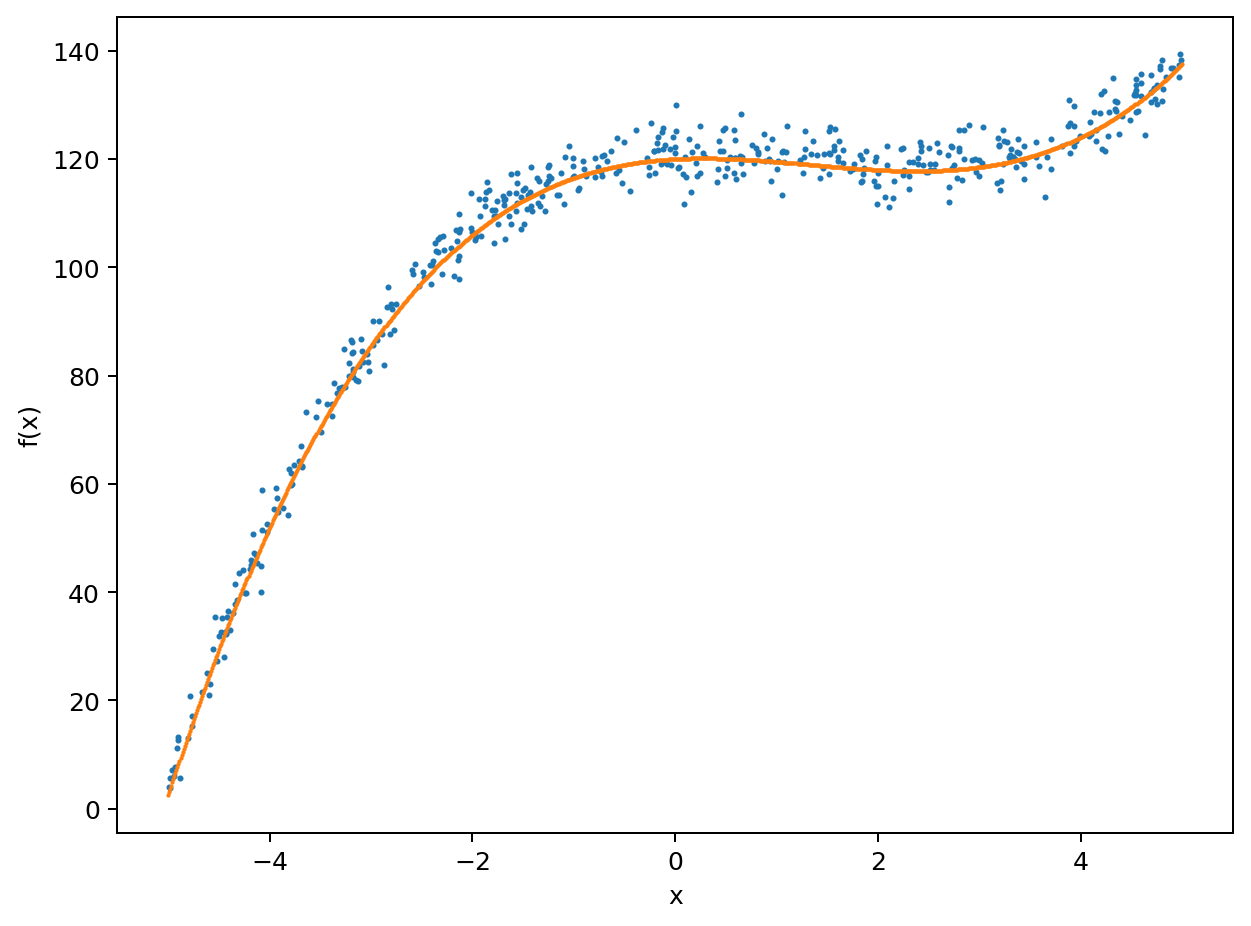

In [59]:
from numpy.polynomial.polynomial import polyval

def cubic_1D(x, c=[1, -2, 0.5, 120]):
    # setting coefficient of x^0 to 0 because I use the intercept
    return poly_1D(x, [0] + c[0:-1], c[-1])
    #c[0]* x + c[1]* x**2 + c[2]* x**3 + c[3]

def poly_1D(x, c, intercept):
    degree = len(c) - 1
    p = polyval(x, c)
    return p + intercept
    #return c[0] + x.dot(c[1:])

np.random.seed(999)

# sample points in a random uniform way for the x, between xmin and xmax
xmin = -5
xmax =  5
n_samples = 500
X = xmin + (xmax-xmin) * np.random.random(size=(n_samples,1))

# get the value of the function and apply to each point a Normal noise, heteroscedastic
sigma = 3
mu = 1
Y = cubic_1D(X) + (sigma * np.random.randn(n_samples,1) + mu)

# plot the data
plt.figure(figsize=(8,6))
plt.scatter(X, Y, s=2)

# plot the ground truth function
x = np.linspace(xmin, xmax, 1000)
plt.scatter(x, cubic_1D(x), s=0.5)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Let's see what linear regression can do in this case.

In [35]:
from sklearn import linear_model 

In [36]:
OLS = linear_model.LinearRegression()

OLS.fit(X, Y)

print('Model Coefficients: \n', OLS.coef_, OLS.intercept_)

Model Coefficients: 
 [[8.3895314]] [104.79149935]


Let's plot the line found vs. the ground truth.

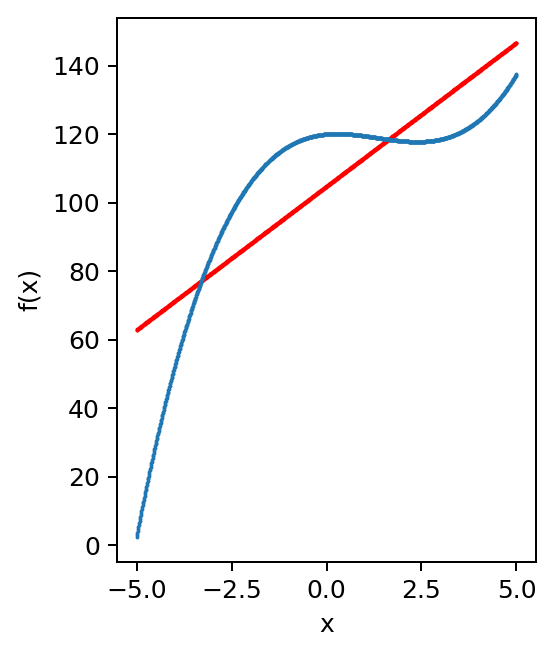

In [37]:
plt.figure(figsize=(3,4))

# plot the OLS line model
x = np.linspace(xmin, xmax, 1000)
OLS_y = OLS.intercept_ + OLS.coef_ * x
plt.scatter(x, OLS_y, color='r', s=0.3)

# plot the ground truth function
x = np.linspace(xmin, xmax, 1000)
plt.scatter(x, cubic_1D(x), s=0.3)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

**QUIZ:**

If I use more data points (e.g., 1000000) the fit will improve

1. True<br><p>

1. False<br><p>

1. Undecided<br><p>


In [38]:
# Make predictions using the training set itself
targets_pred = OLS.predict(X)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# The rooted mean squared error
print('Root Mean Square Error: {:.2f}'.format(np.sqrt(mean_squared_error(Y, targets_pred))))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): {:.2f}'.format(r2_score(Y, targets_pred)))
      

Root Mean Square Error: 18.03
Coefficient of determination (R2): 0.64


Numbers tell that the fit isn't good, as we can visually assess.

### Example: polynomial features and linear regression for a cubic function

Let's use a **polynomial feature transformation** to get it right.

Let's start with some wild guess for the degree, such as 6, since the higher the better, isn't??? A higher-degree polynomial can easily fit complex functions ...

In [41]:
import scipy

from sklearn.preprocessing import PolynomialFeatures

degree = 6
poly = PolynomialFeatures(degree=degree, include_bias=True)

#X_poly = poly.fit(X, Y)
X_poly = poly.fit_transform(X)

**QUIZ:**

How many parameters do I have to learn in this case?

1. 6<br><p>

1. 5<br><p>

1. 7<br><p>

1. Still 2<br><p>


In [42]:
# how many features -> parameters?
orig_features = 1
poly_degree = 6
print(int(scipy.special.binom(orig_features + poly_degree, poly_degree)))

# this is the same as the shape[1] of the polynomial feature array 
# created by fit_transform()

7


In [43]:
OLS_p = linear_model.LinearRegression()
      
OLS_p.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
# Make predictions using the training set itself
targets_pred = OLS_p.predict(X_poly)

In [45]:
# The rooted mean squared error
print('Root Mean Square Error: {:.2f}'.format(np.sqrt(mean_squared_error(Y, targets_pred))))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): {:.2f}'.format(r2_score(Y, targets_pred)))
      

Root Mean Square Error: 3.10
Coefficient of determination (R2): 0.99


It's way better now!

In [46]:
print('Model Coefficients: \n', OLS_p.coef_, OLS_p.intercept_)

Model Coefficients: 
 [[ 0.00000000e+00  9.23703708e-01 -1.87600324e+00  5.11972922e-01
  -1.18873988e-02 -5.30416272e-04  2.98615653e-04]] [120.85876255]


(7,) (1000,)


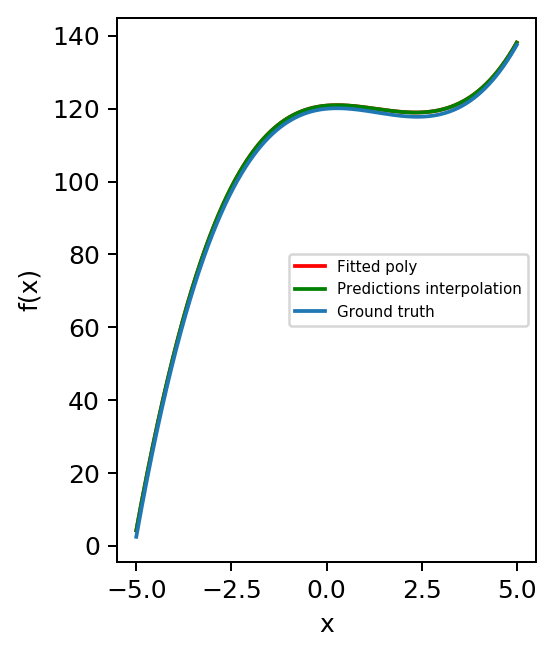

In [48]:
plt.figure(figsize=(3,4))

# x coordinates
x_plot = np.linspace(xmin, xmax, 1000).reshape(-1,1)

# plot the polynomial function based on the learned coefficients
coefficients = OLS_p.coef_.ravel()
print(coefficients.shape, x.shape)

# with intercept
plt.plot(x, poly_1D(x, coefficients, OLS_p.intercept_), color='r', label='Fitted poly')

# with intercept set to 0
#plt.plot(x, poly_1D(x, coefficients, 0), color='r', label='Fitted poly')

# plot the predictions and interpolate (it should be the same polynomial!)
# transform the linear features
x_poly_plot = poly.fit_transform(x_plot)
# get y values, the predictions, from the learned model
y_poly_plot = OLS_p.predict(x_poly_plot)
#plt.scatter(x_plot, y_poly_plot, color='r', s=0.3)
plt.plot(x_plot, y_poly_plot, color='g', label='Predictions interpolation')


# plot the ground truth function
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, cubic_1D(x), label='Ground truth')


plt.legend(fontsize=6, loc='center right')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Is the model the best model? Are all transformed features equally contributing?

We made the *wild* guess of a polynomial order equal to 6. How can we assess if it is a good guess or not? It seems very good indeed ...

Let's first print out the full polynomial model and store the polynomial labels as strings

In [49]:
poly.powers_

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [50]:
coeff = OLS_p.coef_.ravel()
intercept = OLS_p.intercept_

# print out the polynomial model 
poly_str = ''
poly_labels = []
for i,p in enumerate(poly.powers_.ravel()):
    if i == 0:
        poly_str += '{}{:.2f} '.format('' if intercept > 0 else '- ', abs(intercept[0]))
    else:
        poly_str += '{}{:.2f}'.format('+ ' if coeff[i] > 0 else '- ', abs(coeff[i]))
        poly_str += 'x^{} '.format(p)
        poly_labels.append('$x^{}$'.format(p))
        
print('Polynomial model:\n', poly_str)

poly_labels  # stored in a LaTeX format to have a pretty printing with matplotlib

Polynomial model:
 120.86 + 0.92x^1 - 1.88x^2 + 0.51x^3 - 0.01x^4 - 0.00x^5 + 0.00x^6 


['$x^1$', '$x^2$', '$x^3$', '$x^4$', '$x^5$', '$x^6$']

**QUIZ:**

Which features do matter here?

1. All<br><p>

1. $x^1$ and $x^2$<br><p>

1. Boh?!<br><p>

1. None of the above $\rightarrow$ $x^1, x^2, x^3$ matter
    <br><p>


### Show relative feature importance

Let's show the **importance of the features** based on the values of the learned coefficients

Text(0.5, 0, 'Importance')

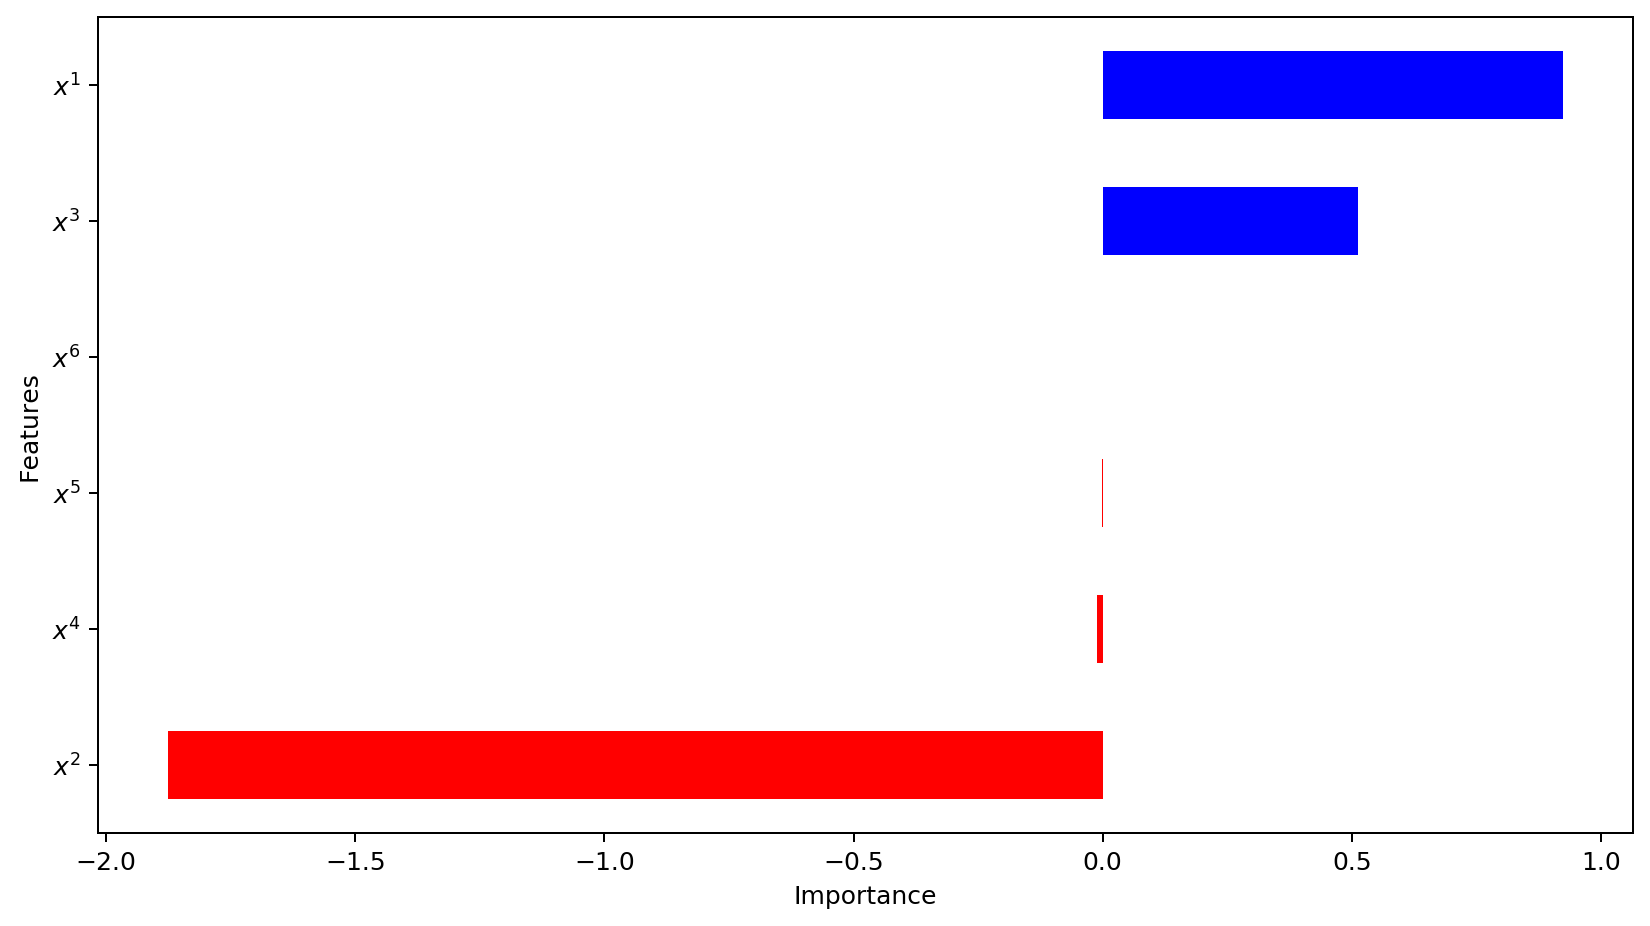

In [52]:
labels = poly_labels

features = pd.DataFrame()
features['Features'] = labels

features['importance'] = coeff[1:]

features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),
                         color = features.positive.map({True: 'blue', 
                                                        False: 'red'}))
plt.xlabel('Importance')

The ground truth cubic model is:
    $$ y = x - 2x^2 + 0.5x^3 + 120$$

Which is precisely what we have learned: <br><p>
- Feature $x^2$ is negative and weights double the feature $x$ <br><p>
- Feature $x^3$ is positive and has half of the weight of feature $x$<br><p>
- Features with order higher than three have 0 or very little weight

### Remove unnecessary features, select model complexity

From the numerical results above, we can safely remove features $x^4, x^5, x^6$ from the model and stick with a polynomial model of order 3. 

Can we make this search for model / feature complexity, and, in general, for model's hyperparameters more systematic?

- Check the value of the **weights of the features** in the learned model: most likely, those with little weight can be safely removed <br><p>

- Check the **correlation matrix:** retain the features that are highly correlated with the target values and that are not mutually correlated<br><p>

- Perform a **cross-validated search in the parameter space** to select the most appropriate values for the parameters (those that can guarantee a good generalization error)


### Cross-Validated Grid search 

Let's use a `Pipeline` object to compact the process of generating polynomial features and performing OLS

#### We already know the good values for the (hyper)parameters 

If we already know what degree is good for our polynomial features (e.g., 4), the code in the cell below does the job of generating the features, fitting them to a linear model, and get a cross-validated estimate of generalization performance.

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

model = Pipeline([('poly', PolynomialFeatures(degree=4)),
                  ('linear', linear_model.LinearRegression())])

cv_results = cross_validate(model, X, Y, cv=3, 
                            return_train_score=True)

print('Mean test score: {:.3f} (std: {:.3f})'
      '\nMean train score: {:.3f} (std: {:.3f})'.format(np.mean(cv_results['test_score']),
                                              np.std(cv_results['test_score']),
                                              np.mean(cv_results['train_score']),
                                              np.std(cv_results['train_score'])))

Mean test score: 0.989 (std: 0.001)
Mean train score: 0.989 (std: 0.000)


#### We don't know the good values: let's search for them!

However, it makes sense to perform a **cross-validated search over a set of candidate values** instead of committing to one specific value, or search manually for it.

`GridSearchCV()` automates the search process!

In [57]:
from sklearn import model_selection 

model = Pipeline([('poly', PolynomialFeatures()),  # this time no degree is passed!!
                   ('linear', linear_model.LinearRegression())])


# estimator object that will perform a grid search over the
# set of the given hyperparameters

parameters_grid = {'poly__degree': [1,2,3,4,5,6,7,8] }
    
estimator = model_selection.GridSearchCV(model, parameters_grid)
    
# fit the estimator to the training data
estimator.fit(X, Y)

print('Best accuracy score: {:.3f}'.format(estimator.best_score_))

print('Best estimator: {}'.format(estimator.best_estimator_))

print('\nBest degree for polynomial features: {}'.format(estimator.best_params_['poly__degree']))


Best accuracy score: 0.989
Best estimator: Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

Best degree for polynomial features: 4


We have found what we had already discovered, but this time in a systematic and compact way!

Indeed 3 and 4 provide an equally good result. 

## Control of model complexity: explicit selection and implicit regularization 

We aim to **control model complexity** in order to favor <u>generalization</u> and at the same time minimize the number of (unnecessary) features that (necessarily) makes our <u>computations heavier.</u>

There are number of different ways are possible to act upon model complexity.

***
1. <font style="color:red">Keep the number of features (or feature functions) low. </font>
    
   - This is what we have done above, it can be realized by performing some <u>explicit search</u> in the feature/model space.<br><p>
   - **This is an explicit design choice when selecting the hypothesis class.**
***

***
2. <font style="color:red">Keep the magnitude of the weights ${\bf w}$ small. </font>

  - Design choice that can be realized in an <u>implicit</u> way by *modifying* the loss function $\ell({\bf w})$<br><p>
  - **Regularization**
***

### Regularization

<u>Regularized loss function, $\ell^R({\bf w})$</u>

<div>
  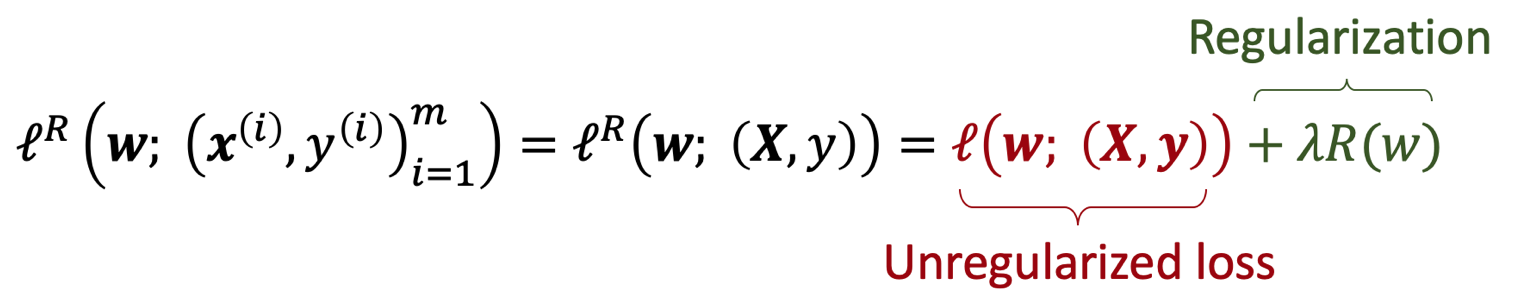
</div>


<font size="+0.2">
    
- The loss function $\ell$ is a measure of model-fit on the training data <br><p>

- The regularizer $R({\bf w})$, weighted by the parameter $\lambda$, **prevents the model from becoming too complex.** It's role is to:<br><p>
    - <font style="color:red">penalize weight values that are large,</font> such that weights do not get large values if not strictly necessary for minimizing the loss (main role of $R({\bf w})$);<br><p>
    - <font style="color:red">*possibly* bring to zero weights that are very small.</font><br><p>
    
- Regularization is particularly important for small $m$, large feature spaces
</font>

<div>
  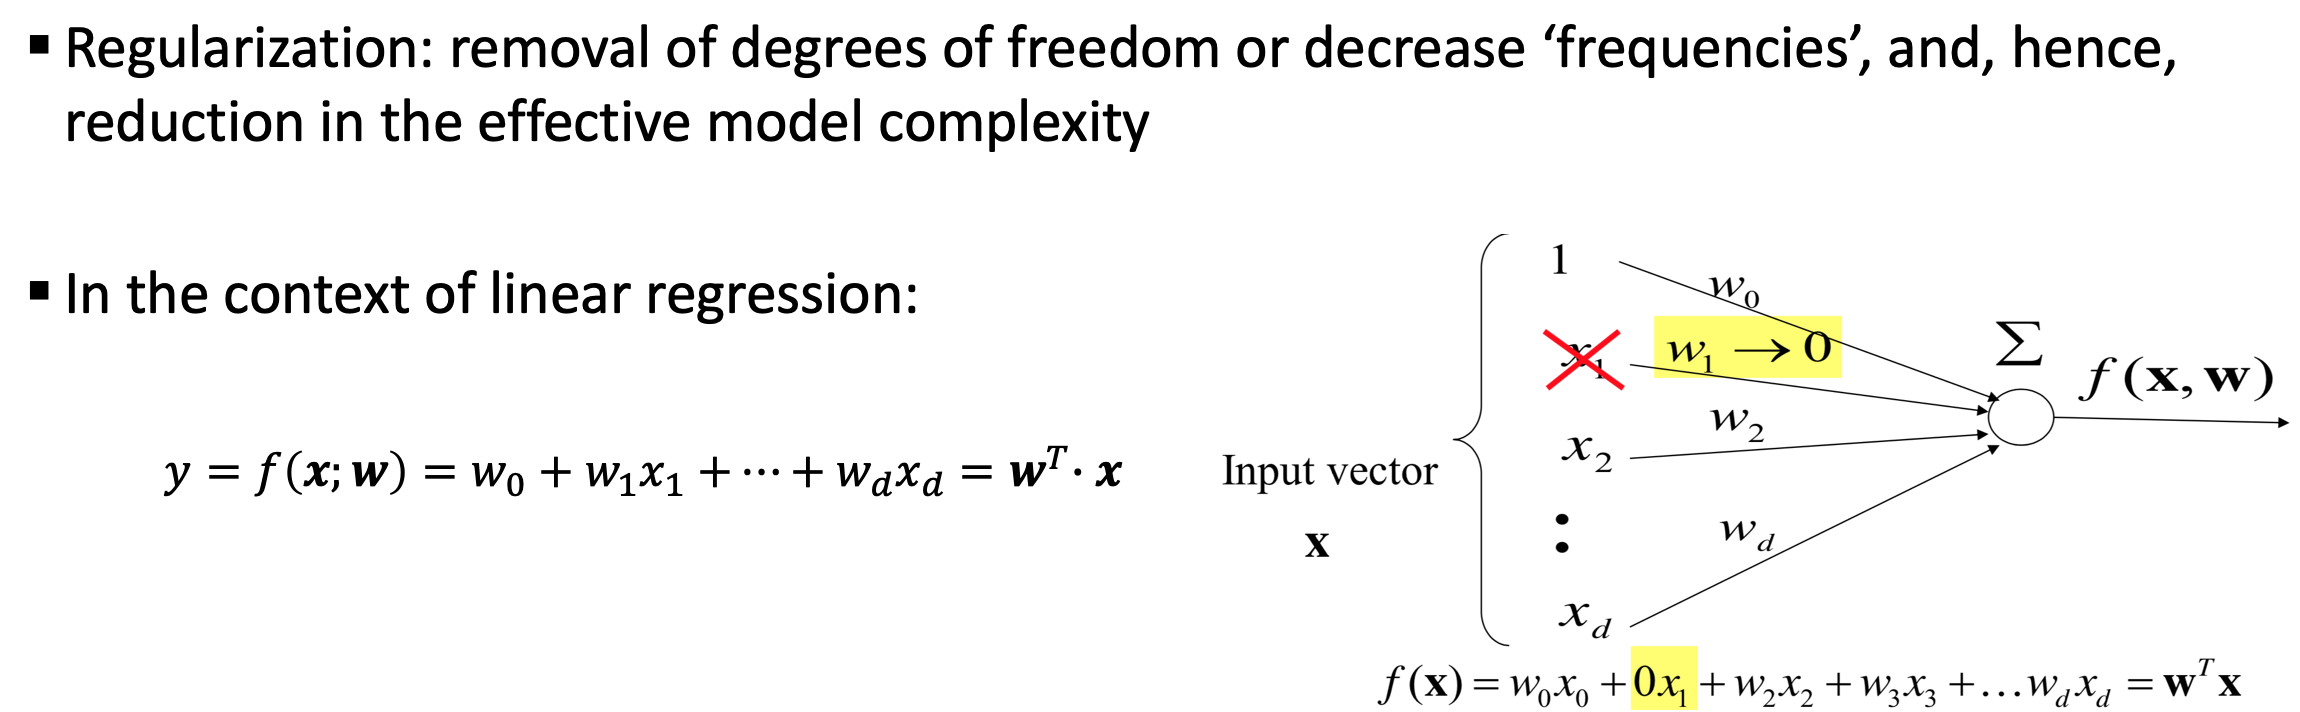
</div>

 ... to be continued ...